<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/CV/7_Modelos_Generativos/GANs.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

# Redes generativas adversarias

A lo largo de la mayor parte de este curso, hemos hablado sobre cómo hacer predicciones. De una forma u otra, utilizamos mapeos aprendidos de redes neuronales profundas desde ejemplos de datos hasta etiquetas. Este tipo de aprendizaje se llama **aprendizaje discriminativo**, ya que nos gustaría poder discriminar entre fotos de gatos y fotos de perros. Los clasificadores y los regresores son ejemplos de aprendizaje discriminativo. Y las redes neuronales entrenadas por backpropagation han revolucionado todo lo que creíamos saber sobre el aprendizaje discriminativo en conjuntos de datos grandes y complicados. Las precisiones de clasificación en imágenes de alta resolución han pasado de ser inútiles a niveles humanos (con algunas salvedades) en solo 5 o 6 años. Le ahorraremos otra perorata sobre todas las demás tareas discriminatorias en las que las redes neuronales profundas funcionan asombrosamente bien.

Pero hay más en el aprendizaje automático que simplemente resolver tareas discriminatorias. Por ejemplo, dado un gran conjunto de datos, sin etiquetas, podríamos querer aprender un modelo que capture de manera concisa las características de estos datos. Dado tal modelo, podríamos **muestrear** ejemplos de datos sintéticos que se asemejen a la distribución de los datos de entrenamiento. Por ejemplo, dado un gran corpus de fotografías de rostros, es posible que queramos poder generar una nueva imagen fotorrealista que parezca plausible que provenga del mismo conjunto de datos. Este tipo de aprendizaje se llama **modelado generativo**.

Hasta hace poco, no teníamos ningún método que pudiera sintetizar nuevas imágenes fotorrealistas. Pero el éxito de las redes neuronales profundas para el aprendizaje discriminativo abrió nuevas posibilidades. Una gran tendencia en los últimos tres años ha sido la** aplicación de redes profundas discriminatorias para superar desafíos en problemas que generalmente no consideramos como problemas de aprendizaje supervisado**. Los modelos de lenguaje de redes neuronales recurrentes son un ejemplo del uso de una red discriminativa (entrenada para predecir el siguiente carácter) que, una vez entrenada, puede actuar como un modelo generativo.

En 2014, un artículo innovador presentó las redes adversarias generativas (GAN), una nueva forma inteligente de aprovechar el poder de los modelos discriminativos para obtener buenos modelos generativos. En esencia, las GAN se basan en la idea de que un generador de datos es bueno **si no podemos distinguir los datos falsos de los datos reales**. En estadística, esto se denomina prueba de dos muestras: una prueba para responder a la pregunta de si los conjuntos de datos $X=\{x_1,\ldots, x_n\}$ y $X'=\{x'_1,\ldots, x' _n\}$ se extrajeron de la misma distribución. La principal diferencia entre la mayoría de los artículos estadísticos y los GAN es que estos últimos utilizan esta idea de manera constructiva. En otras palabras, en lugar de simplemente entrenar a un modelo para que diga "oiga, estos dos conjuntos de datos no parecen provenir de la misma distribución", usan la [prueba de dos muestras](https://en.wikipedia.org/wiki/Two-sample_hypothesis_testing) para proporcionar señales de entrenamiento a un modelo generativo. Esto nos permite mejorar el generador de datos hasta que genere algo que se asemeje a los datos reales. Como mínimo, necesita engañar al clasificador. Incluso si nuestro clasificador es una red neuronal profunda de última generación.

![Imgur](https://i.imgur.com/ya1gA5H.png)

La arquitectura GAN se ilustra en la figura de arriba.
Como puede ver, hay dos piezas en la arquitectura GAN: en primer lugar, necesitamos una red que ssea capaz de generar datos que luzcan igual que la cosa real. Si estamos tratando con imágenes, esto necesita generar imágenes. Si se trata de habla, necesita generar secuencias de audio, y así sucesivamente. A esta la llamamos la **red generadora**. El segundo componente es la **red discriminadora**. Intenta distinguir los datos falsos de los reales. Ambas redes compiten entre sí. La red generadora intenta engañar a la red discriminadora. En ese momento, la red discriminadora se adapta a los nuevos datos falsos. Esta información, a su vez, se utiliza para mejorar la red generadora, y así sucesivamente.


El discriminador es un clasificador binario para distinguir si la entrada $x$ es real (de datos reales) o falsa (del generador). Por lo general, el discriminador genera una predicción escalar $o\in\mathbb R$ para la entrada $\mathbf x$, por ejemplo, usando una capa densa con una sola neurona, y luego aplica la función sigmoidea para obtener la probabilidad predicha $D(\mathbf x) = 1/(1+e^{-o})$. Suponga que la etiqueta $y$ para los datos verdaderos es $1$ y $0$ para los datos falsos. Entrenamos al discriminador para minimizar la pérdida de entropía cruzada, *es decir*,

$$ \min_D \{ - y \log D(\mathbf x) - (1-y)\log(1-D(\mathbf x)) \},$$

Para el generador, primero se extrae algún parámetro $\mathbf z\in\mathbb R^d$ de una fuente de aleatoriedad, *p. ej.*, una distribución normal $\mathbf z \sim \mathcal{N}(0, 1)$ A menudo llamamos $\mathbf z$ como la variable latente. Luego, se aplica una función para generar $\mathbf x'=G(\mathbf z)$. El objetivo del generador es engañar al discriminador para clasificar $\mathbf x'=G(\mathbf z)$ como datos verdaderos, *es decir*, queremos $D( G(\mathbf z)) \approx 1$. En otras palabras, para un discriminador dado $D$, actualizamos los parámetros del generador $G$ para maximizar la pérdida de entropía cruzada cuando $y=0$, *es decir*,

$$ \max_G \{ - (1-y) \log(1-D(G(\mathbf z))) \} = \max_G \{ - \log(1-D(G(\mathbf z))) \}.$$

Si el generador hace un trabajo perfecto, entonces $D(\mathbf x')\approx 1$ por lo que la pérdida anterior se acerca a 0, lo que da como resultado que los gradientes sean demasiado pequeños para hacer un buen progreso para el discriminador. Así que comúnmente minimizamos la siguiente pérdida:

$$ \min_G \{ - y \log(D(G(\mathbf z))) \} = \min_G \{ - \log(D(G(\mathbf z))) \}, $$

que es solo alimentar $\mathbf x'=G(\mathbf z)$ en el discriminador pero dando la etiqueta $y=1$.


En resumen, $D$ y $G$ están jugando un juego "minimax" con la función de objetivo integral:

$$min_D max_G \{ -E_{x \sim \text{Data}} log D(\mathbf x) - E_{z \sim \text{Ruido}} log(1 - D(G(\mathbf z)) ) \}.$$



Muchas de las aplicaciones de GAN están en el contexto de las imágenes. A modo de demostración, nos vamos a contentar con ajustar primero una distribución mucho más sencilla. Ilustraremos lo que sucede si usamos GAN para construir el estimador de parámetros más ineficiente del mundo para un gaussiano. Empecemos.





In [31]:
%matplotlib inline
import torch
from torch import nn

## Generando algunos datos "reales"

Dado que este será el ejemplo más lamentable del mundo, simplemente generaremos datos extraídos de una gaussiana.


In [32]:
X = torch.normal(0.0, 1, (1000, 2))
A = torch.tensor([[1, 2], [-0.1, 0.5]])
b = torch.tensor([1, 2])
data = torch.matmul(X, A) + b

Let's see what we got. This should be a Gaussian shifted in some rather arbitrary way with mean $b$ and covariance matrix $A^TA$.


La matriz de covarianza es
tensor([[1.0100, 1.9500],
        [1.9500, 4.2500]])


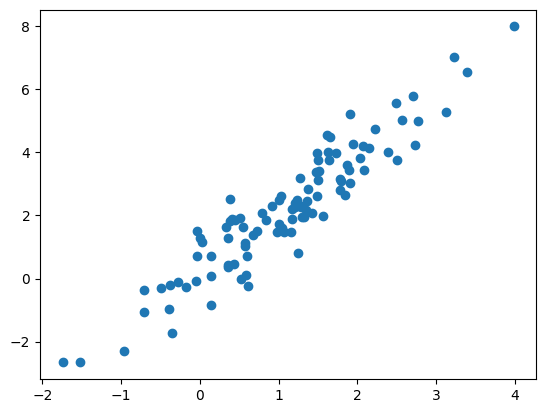

In [33]:
from matplotlib import pyplot as plt
plt.scatter(data[:100, 0].detach().numpy(), data[:100, 1].detach().numpy());
print(f'La matriz de covarianza es\n{torch.matmul(A.T, A)}')

In [34]:
from torch.utils.data import TensorDataset,DataLoader
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = TensorDataset(*data_arrays)
    return DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 8
data_iter = load_array((data,), batch_size)

## Generador

Nuestra red generadora será la red más simple posible: un modelo lineal de una sola capa. Esto se debe a que alimentaremos esa red lineal con un generador de datos gaussiano. Por lo tanto, literalmente solo necesita aprender los parámetros para falsificar cosas a la perfección.



In [35]:
net_G = nn.Sequential(nn.Linear(2, 2))

## Discriminador

Para el discriminador seremos un poco más discriminatorios: usaremos un MLP con 3 capas para hacer las cosas un poco más interesantes.


In [36]:
net_D = nn.Sequential(
    nn.Linear(2, 5), nn.Tanh(),
    nn.Linear(5, 3), nn.Tanh(),
    nn.Linear(3, 1))

## Entrenamiento

Primero, definimos una función para actualizar los pesos del Discriminador.


In [37]:
def update_D(X, Z, net_D, net_G, loss, trainer_D):
    """Actualiza el Discriminador."""
    batch_size = X.shape[0]
    ones = torch.ones((batch_size,), device=X.device)
    zeros = torch.zeros((batch_size,), device=X.device)
    trainer_D.zero_grad()
    real_Y = net_D(X)
    fake_X = net_G(Z)
    # No hace falta calcular los gradientes de `net_G`,
    # le hacemos un detach a su salida
    fake_Y = net_D(fake_X.detach())
    loss_D = (loss(real_Y, ones.reshape(real_Y.shape)) +
              loss(fake_Y, zeros.reshape(fake_Y.shape))) / 2
    loss_D.backward()
    trainer_D.step()
    return loss_D

El generador se actualiza de manera similar. Aquí reutilizamos la pérdida de entropía cruzada pero cambiamos la etiqueta de los datos falsos de $0$ a $1$.


In [38]:

def update_G(Z, net_D, net_G, loss, trainer_G):
    """Actualiza el generador."""
    batch_size = Z.shape[0]
    ones = torch.ones((batch_size,), device=Z.device)
    trainer_G.zero_grad()
    # Se podría usar el `fake_X` del `update_D` para ahorrar cálculo
    fake_X = net_G(Z)
    # Recalcular `fake_Y` es necesario ya que `net_D` ya se actualizó en este punto
    fake_Y = net_D(fake_X)
    loss_G = loss(fake_Y, ones.reshape(fake_Y.shape))
    loss_G.backward()
    trainer_G.step()
    return loss_G

Tanto el discriminador como el generador realizan una regresión logística binaria con la pérdida de entropía cruzada. Usamos a Adam para suavizar el proceso de entrenamiento. En cada iteración, primero actualizamos el discriminador y luego el generador. Visualizamos tanto pérdidas como ejemplos generados.


In [39]:
#@markdown Código para animación
from IPython import display
import time

class Accumulator:
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        """Defined in :numref:`sec_utils`"""
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

class Timer:
    """Record multiple running times."""
    def __init__(self):
        """Defined in :numref:`sec_minibatch_sgd`"""
        self.times = []
        self.start()

    def start(self):
        """Start the timer."""
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time."""
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib.

    Defined in :numref:`sec_calculus`"""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()


class Animator:
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(7, 5)):
        """Defined in :numref:`sec_utils`"""
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        #use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [40]:
def train(net_D, net_G, data_iter, num_epochs, lr_D, lr_G, latent_dim, data):
    #Declara la pérdida
    loss = nn.BCEWithLogitsLoss(reduction='sum')
    #Inicializa ambas redes
    for w in net_D.parameters():
        nn.init.normal_(w, 0, 0.02)
    for w in net_G.parameters():
        nn.init.normal_(w, 0, 0.02)
    #Declara los optimizadores
    trainer_D = torch.optim.Adam(net_D.parameters(), lr=lr_D)
    trainer_G = torch.optim.Adam(net_G.parameters(), lr=lr_G)
    #Prepara el graficador de curvas
    animator = Animator(xlabel='epoch', ylabel='loss',
                            xlim=[1, num_epochs], nrows=2, figsize=(5, 5),
                            legend=['discriminator', 'generator'])
    animator.fig.subplots_adjust(hspace=0.3)
    #Comienza a entrenar
    for epoch in range(num_epochs):
        # Entrena una Epoch
        timer = Timer()
        metric = Accumulator(3)  # loss_D, loss_G, num_examples
        for (X,) in data_iter:
            batch_size = X.shape[0]
            Z = torch.normal(0, 1, size=(batch_size, latent_dim))
            metric.add(update_D(X, Z, net_D, net_G, loss, trainer_D),
                       update_G(Z, net_D, net_G, loss, trainer_G),
                       batch_size)
        # Visualiza los ejemplos generados
        Z = torch.normal(0, 1, size=(100, latent_dim))
        fake_X = net_G(Z).detach().numpy()
        animator.axes[1].cla()
        animator.axes[1].scatter(data[:, 0], data[:, 1])
        animator.axes[1].scatter(fake_X[:, 0], fake_X[:, 1])
        animator.axes[1].legend(['real', 'generated'])
        # Muestra las pérdidas
        loss_D, loss_G = metric[0]/metric[2], metric[1]/metric[2]
        animator.add(epoch + 1, (loss_D, loss_G))
    print(f'loss_D {loss_D:.3f}, loss_G {loss_G:.3f}, '
          f'{metric[2] / timer.stop():.1f} examples/sec')

Ahora especificamos los hiperparámetros para que se ajusten a la distribución gaussiana.


loss_D 0.693, loss_G 0.693, 1617.7 examples/sec


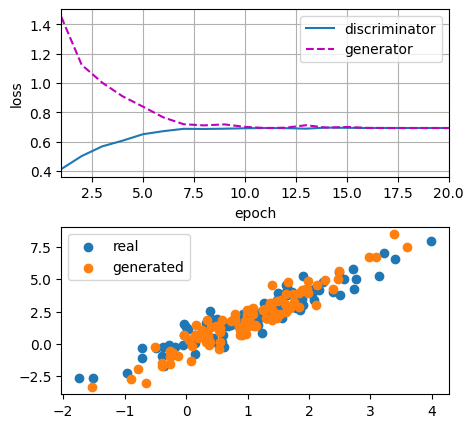

In [41]:
lr_D, lr_G, latent_dim, num_epochs = 0.05, 0.005, 2, 20
train(net_D, net_G, data_iter, num_epochs, lr_D, lr_G,
      latent_dim, data[:100].detach().numpy())

# Redes Generativas Adversarias Convolucionales Profundas (DCGAN)

En la sección anterior, presentamos las ideas básicas sobre cómo funcionan las GAN. Mostramos que pueden extraer muestras de una distribución simple y fácil de muestrear, como una distribución uniforme o normal, y transformarlas en muestras que parecen coincidir con la distribución de algún conjunto de datos. Y aunque nuestro ejemplo de hacer coincidir una distribución gaussiana en 2D entendió el punto, no es especialmente emocionante.

En esta sección, demostraremos cómo puede usar GAN para generar imágenes. Basaremos nuestros modelos en las GAN convolucionales profundas (DCGAN) presentadas en [este paper](https://d2l.ai/chapter_references/zreferences.html#id218). Tomaremos prestada la arquitectura convolucional que ha demostrado ser tan exitosa para los problemas discriminativos de visión por computadora y mostraremos cómo se pueden aprovechar a través de las GAN para generar imágenes.

## Dataset FIFA

El conjunto de datos que usaremos es una colección de imágenes de jugadores de futbol profesionales obtenidos de sofifa.com. Primero descarguemos, extraigamos y carguemos este conjunto de datos.

In [ ]:
!gdown https://drive.google.com/uc?id=1zpT6gHzvbr21_Vq4NjpRY0JGSaQOSANa
!unzip fifa.zip



In [12]:
import os
import torchvision
import torch
def remove_noise(image):
    alpha = image[3, :,:]> 50
    alpha = alpha.type(torch.uint8)
    noise_filtered = torch.mul(alpha, image)
    return noise_filtered[:3,:,:]

def read_voc_images(voc_dir, n=-1,  is_train=True):
    """Read all VOC feature and label images."""
    files = [os.path.join(voc_dir, file) for file in os.listdir(voc_dir)]
    #files = files.sort()
    files = sorted(files, key=lambda i: int(os.path.splitext(os.path.basename(i))[0]))
    mode = torchvision.io.image.ImageReadMode.RGB_ALPHA
    features, labels = [], []
    for i, fname in enumerate(files):
        l = fname.split("/")
        if i==n: break
        try:
          img = remove_noise(torchvision.io.read_image(os.path.join(
            voc_dir, fname)))
        except:
          continue
        features.append(img)
        labels.append(int(l[-1][:-4]))
    return features, labels



In [13]:
import pandas as pd
data = pd.read_csv("data.csv")
f, l = read_voc_images("/content/Images")
names = list(data["Name"])

Veamos algunas imágenes del dataset.

In [14]:
#@markdown función show_images
from matplotlib import pyplot as plt
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images.

    Defined in :numref:`sec_utils`"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        try:
            img = img.detach().numpy()
        except:
            pass
        ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

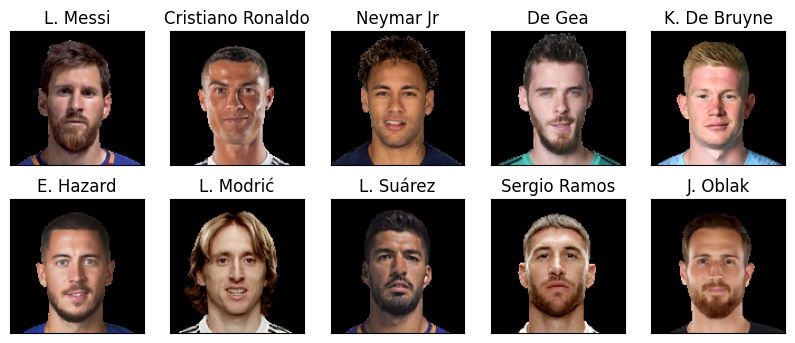

In [45]:
imgs = [img.permute(1,2,0) for img in f]
show_images(imgs, 2, 5, scale=2,titles = names);

Definimos un dataset personalizado para estas imágenes y cargamos con él un dataloader con 256 de tamaño de lote.

In [46]:
class FIFADataset(torch.utils.data.Dataset):
    def __init__(self, img_list, labels, names):
        super(FIFADataset, self).__init__()
        self.img_list = img_list
        self.labels = labels
        self.names = names
        self.transform = torchvision.transforms.Resize((64,64))

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        img = self.img_list[idx]
        l  = self.labels[idx]
        n  = self.names[idx]
        return self.transform(img.type(torch.float32)), l, n

In [47]:
fifa = FIFADataset(f,l,names)
batch_size = 256
data_iter = torch.utils.data.DataLoader(
    fifa, batch_size=batch_size,
    shuffle=True, num_workers=2)

## El Generador

El generador necesita mapear la variable de ruido $\mathbf z\in\mathbb R^d$, un vector de longitud-$d$, a una imagen RGB con un ancho y un alto de $64\times 64$. El bloque básico del generador contiene una capa de convolución transpuesta seguida de la normalización por lotes y la activación de ReLU.


In [48]:
from torch import nn
class G_block(nn.Module):
    def __init__(self, out_channels, in_channels=3, kernel_size=4, strides=2,
                 padding=1, **kwargs):
        super(G_block, self).__init__(**kwargs)
        self.conv2d_trans = nn.ConvTranspose2d(in_channels, out_channels,
                                kernel_size, strides, padding, bias=False)
        self.batch_norm = nn.BatchNorm2d(out_channels)
        self.activation = nn.ReLU()

    def forward(self, X):
        return self.activation(self.batch_norm(self.conv2d_trans(X)))

De forma predeterminada, la capa de convolución transpuesta utiliza un kernel $k_h = k_w = 4$, un stride $s_h = s_w = 2$ y un padding $p_h = p_w = 1$. Con una entrada de forma $n_h \times n_w = 16 \times 16$, el bloque generador duplicará el ancho y la altura de la entrada.

$$
\begin{aligned}
n_h^{'} \times n_w^{'} &= [(n_h k_h - (n_h-1)(k_h-s_h)- 2p_h] \times [(n_w k_w - (n_w-1)(k_w-s_w)- 2p_w]\\
  &= [(k_h + s_h (n_h-1)- 2p_h] \times [(k_w + s_w (n_w-1)- 2p_w]\\
  &= [(4 + 2 \times (16-1)- 2 \times 1] \times [(4 + 2 \times (16-1)- 2 \times 1]\\
  &= 32 \times 32 .\\
\end{aligned}
$$


In [49]:
x = torch.zeros((2, 3, 16, 16))
g_blk = G_block(20)
g_blk(x).shape

torch.Size([2, 20, 32, 32])

Si se cambia el kernel de la capa de convolución transpuesta a uno de $4\times 4$, un stride de 1 y un padding 0, aumentará cuatro veces el tamaño de una entrada de $1 \times 1$.


In [50]:
x = torch.zeros((2, 3, 1, 1))
g_blk = G_block(20, strides=1, padding=0)
g_blk(x).shape

torch.Size([2, 20, 4, 4])

El generador consiste en cuatro bloques básicos que aumentan el ancho y el alto de la entrada de 1 a 32. Al mismo tiempo, primero proyecta la variable latente en $64\times 8$ canales, y luego reduce a la mitad los canales cada vez. Por último, se utiliza una capa más de convolución transpuesta para generar la salida. Duplica aún más el ancho y la altura para que coincida con la forma deseada de $64\times 64$, y reduce el tamaño del canal a $3$. La función de activación tanh se aplica a los valores de salida del proyecto en el rango $(-1, 1)$.


In [51]:
n_G = 64
net_G = nn.Sequential(
    G_block(in_channels=100, out_channels=n_G*8,
            strides=1, padding=0),                  # Output: (64 * 8, 4, 4)
    G_block(in_channels=n_G*8, out_channels=n_G*4), # Output: (64 * 4, 8, 8)
    G_block(in_channels=n_G*4, out_channels=n_G*2), # Output: (64 * 2, 16, 16)
    G_block(in_channels=n_G*2, out_channels=n_G),   # Output: (64, 32, 32)
    nn.ConvTranspose2d(in_channels=n_G, out_channels=3,
                       kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh())  # Output: (3, 64, 64)

Generemos una variable latente de 100 dimensiones para verificar la forma de la salida del generador.

In [52]:
x = torch.zeros((1, 100, 1, 1))
net_G(x).shape

torch.Size([1, 3, 64, 64])

## El Discriminador

El discriminador es una red convolucional normal excepto que utiliza una Leaky ReLU como su función de activación. Dado $\alpha \in[0, 1]$, su definición es

$$\textrm{leaky ReLU}(x) = \begin{cases}x & \text{if}\ x > 0\\ \alpha x &\text{otherwise}\end{cases}.$$

Como puede verse, es la ReLU normal si $\alpha=0$, y una función identidad si $\alpha=1$. Para $\alpha \in (0, 1)$, Leaky ReLU es una función no lineal que proporciona una salida distinta de cero para una entrada negativa. Su objetivo es solucionar el problema de la "ReLU moribunda" en la que una neurona puede generar un valor negativo siempre y, por lo tanto, no puede hacer ningún progreso ya que el gradiente de ReLU es 0.


In [53]:
#@markdown funciones para graficar
import matplotlib.pyplot as plt
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib.

    Defined in :numref:`sec_calculus`"""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points.

    Defined in :numref:`sec_calculus`"""

    def has_one_axis(X):  # True if `X` (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)


    if axes is None: axes = plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

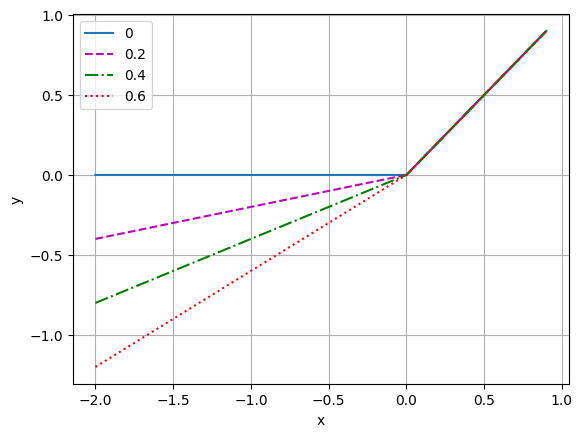

In [54]:

alphas = [0, .2, .4, .6, .8, 1]
x = torch.arange(-2, 1, 0.1)
Y = [nn.LeakyReLU(alpha)(x).detach().numpy() for alpha in alphas]
plot(x.detach().numpy(), Y, 'x', 'y', alphas)

El bloque básico del discriminador es una capa de convolución seguida de una capa de normalización por lotes y una activación de Leaky ReLU. Los hiperparámetros de la capa de convolución son similares a la capa de convolución transpuesta en el bloque generador.

In [55]:
class D_block(nn.Module):
    def __init__(self, out_channels, in_channels=3, kernel_size=4, strides=2,
                padding=1, alpha=0.2, **kwargs):
        super(D_block, self).__init__(**kwargs)
        self.conv2d = nn.Conv2d(in_channels, out_channels, kernel_size,
                                strides, padding, bias=False)
        self.batch_norm = nn.BatchNorm2d(out_channels)
        self.activation = nn.LeakyReLU(alpha, inplace=True)

    def forward(self, X):
        return self.activation(self.batch_norm(self.conv2d(X)))

Un bloque básico con la configuración predeterminada reducirá a la mitad el ancho y el alto de las entradas. Por ejemplo, dada una entrada de forma $n_h = n_w = 16$, con una forma de kernel $k_h = k_w = 4$, un stride $s_h = s_w = 2$ y un padding $p_h = p_w = 1$, la forma de salida será:

$$
\begin{aligned}
n_h^{'} \times n_w^{'} &= \lfloor(n_h-k_h+2p_h+s_h)/s_h\rfloor \times \lfloor(n_w-k_w+2p_w+s_w)/s_w\rfloor\\
  &= \lfloor(16-4+2\times 1+2)/2\rfloor \times \lfloor(16-4+2\times 1+2)/2\rfloor\\
  &= 8 \times 8 .\\
\end{aligned}
$$


In [56]:
x = torch.zeros((1, 3, 16, 16))
d_blk = D_block(20)
d_blk(x).shape

torch.Size([1, 20, 8, 8])

El discriminador es un reflejo del generador.


In [57]:
n_D = 64
net_D = nn.Sequential(
    D_block(n_D),  # Output: (64, 32, 32)
    D_block(in_channels=n_D, out_channels=n_D*2),  # Output: (64 * 2, 16, 16)
    D_block(in_channels=n_D*2, out_channels=n_D*4),  # Output: (64 * 4, 8, 8)
    D_block(in_channels=n_D*4, out_channels=n_D*8),  # Output: (64 * 8, 4, 4)
    nn.Conv2d(in_channels=n_D*8, out_channels=1,
              kernel_size=4, bias=False))  # Output: (1, 1, 1)

It uses a convolution layer with output channel $1$ as the last layer to obtain a single prediction value.


In [58]:
x = torch.zeros((1, 3, 64, 64))
net_D(x).shape

torch.Size([1, 1, 1, 1])

## Entrenamiento

En comparación con el GAN básico que vimos más arriba, usamos la misma tasa de aprendizaje tanto para el generador como para el discriminador, ya que son similares entre sí. Además, cambiamos $\beta_1$ en Adam de $0.9$ a $0.5$. Disminuye la suavidad del momentum, la media móvil ponderada exponencialmente de los gradientes anteriores, para cuidar los gradientes que cambian rápidamente porque el generador y el discriminador luchan entre sí. Además, el ruido generado aleatoriamente `Z` es un tensor 4-D y estamos usando GPU para acelerar el cálculo.


In [59]:
def train(net_D, net_G, data_iter, num_epochs, lr, latent_dim,
          device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')):
    loss = nn.BCEWithLogitsLoss(reduction='sum')
    for w in net_D.parameters():
        nn.init.normal_(w, 0, 0.02)
    for w in net_G.parameters():
        nn.init.normal_(w, 0, 0.02)
    net_D, net_G = net_D.to(device), net_G.to(device)
    trainer_hp = {'lr': lr, 'betas': [0.5,0.999]}
    trainer_D = torch.optim.Adam(net_D.parameters(), **trainer_hp)
    trainer_G = torch.optim.Adam(net_G.parameters(), **trainer_hp)
    animator = Animator(xlabel='epoch', ylabel='loss',
                            xlim=[1, num_epochs], nrows=2, figsize=(5, 5),
                            legend=['discriminator', 'generator'])
    animator.fig.subplots_adjust(hspace=0.3)
    for epoch in range(1, num_epochs + 1):
        # Train one epoch
        timer = Timer()
        metric = Accumulator(3)  # loss_D, loss_G, num_examples
        for X, _,_ in data_iter:
            batch_size = X.shape[0]
            Z = torch.normal(0, 1, size=(batch_size, latent_dim, 1, 1))
            X, Z = X.to(device), Z.to(device)
            metric.add(update_D(X, Z, net_D, net_G, loss, trainer_D),
                       update_G(Z, net_D, net_G, loss, trainer_G),
                       batch_size)
        # Show generated examples
        Z = torch.normal(0, 1, size=(21, latent_dim, 1, 1), device=device)
        # Normalize the synthetic data to N(0, 1)
        fake_x = net_G(Z).permute(0, 2, 3, 1) / 2 + 0.5
        imgs = torch.cat(
            [torch.cat([
                fake_x[i * 7 + j].cpu().detach() for j in range(7)], dim=1)
             for i in range(len(fake_x)//7)], dim=0)
        animator.axes[1].cla()
        animator.axes[1].imshow(imgs)
        # Show the losses
        loss_D, loss_G = metric[0] / metric[2], metric[1] / metric[2]
        animator.add(epoch, (loss_D, loss_G))
    print(f'loss_D {loss_D:.3f}, loss_G {loss_G:.3f}, '
          f'{metric[2] / timer.stop():.1f} examples/sec on {str(device)}')

Entrenamos el modelo con una pequeña cantidad de épocas solo para demostración. Para un mejor rendimiento, la variable num_epochs se puede establecer en un número mayor.

In [ ]:
latent_dim, lr, num_epochs = 100, 0.005, 20
train(net_D, net_G, data_iter, num_epochs, lr, latent_dim)

## Predicción

Una vez entrenada la red, se pueden generar imágenes aleatorias al muestrear un vector latente Z y pasarlo por el generador.

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Z = torch.normal(0, 1, size=(21, latent_dim, 1, 1), device=device)
fake_x = net_G(Z).permute(0, 2, 3, 1) / 2 + 0.5
imgs = torch.cat(
            [torch.cat([
                fake_x[i * 7 + j].cpu().detach() for j in range(7)], dim=1)
             for i in range(len(fake_x)//7)], dim=0)
plt.imshow(imgs)